In [10]:
import nltk
import string
nltk.download('stopwords')
from nltk import FreqDist
from nltk.corpus import stopwords
russian_stopwords = stopwords.words("russian")
russian_stopwords.extend(['это', 'нею', "он", "она", "что", "как", "обломов", "да", 'всё', 'ещё', "мочь", "делать",
                         "свой", 'весь', "сказать", "говорить", "знать", "спросить", "который", "наш"])
import pymorphy2
morph = pymorphy2.MorphAnalyzer()
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
spec_chars = string.punctuation + "\xa0«»\t…–\n'"
from string import ascii_lowercase

def delite_english(str):
    return "".join([ch for ch in str if ch not in ascii_lowercase])

def remove_chars_from_text(text, chars):
    return "".join([ch for ch in text if ch not in chars])

def remove_all(list_of_words, char):
    while char in list_of_words:
        list_of_words.remove(char)
    return list_of_words

def remove_stopwords(list_of_words, extra_words):
    extra_words.append("")
    russian_stopwords.extend(extra_words)
    for stopword in russian_stopwords:
        remove_all(list_of_words, stopword)
    return list_of_words

def normalize(text):
    normal_forms = []
    for word in text:
        normal_forms.append(morph.parse(word.lower())[0].normal_form)
    return normal_forms

def create_wordcloud(list_of_words):
    text_raw = " ".join(list_of_words)
    wordcloud = WordCloud(width = 500, height = 400,
                background_color ='white',
                min_font_size = 13).generate(text_raw)
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.show()

def clean_the_text(file, extra_stopwords):
    f = open(file, 'r')
    text = f.read()
    text = text.replace("–", " ").replace("-", " ").replace(".", " ").replace("\n", " ")
    text = delite_english(text.lower())
    print("--Удаляем специальные символы и знаки пунктуации--")
    text = remove_chars_from_text(text, spec_chars)
    text = remove_chars_from_text(text, string.digits)
    text = text.replace("  ", " ").replace("   ", " ")
    text = text.split(" ")
    print('--Приводим все слова в начальную форму--')
    text = normalize(text)
    print('--Удаляем стоп-слова--')
    text = remove_stopwords(text, extra_stopwords)
    return text

def analyze_the_text(file, stopwords=[""]):
    print("--Начинаем отчистку текста--")
    list_of_words = clean_the_text(file, stopwords)
    print("--Отчистка текста завершена!--\n"
         "--Приступаем к анализу--")
    fdist = FreqDist(list_of_words)
    print("--Наиболее популярные слова в тексте--")
    fdist.plot(30,cumulative=False);
    print("--Облоко слов по данному тексту--")
    create_wordcloud(list_of_words)
    print("--Анализ окончен!--")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Artyo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


--Начинаем отчистку текста--
--Удаляем специальные символы и знаки пунктуации--
--Приводим все слова в начальную форму--
--Удаляем стоп-слова--
--Отчистка текста завершена!--
--Приступаем к анализу--
--Наиболее популярные слова в тексте--


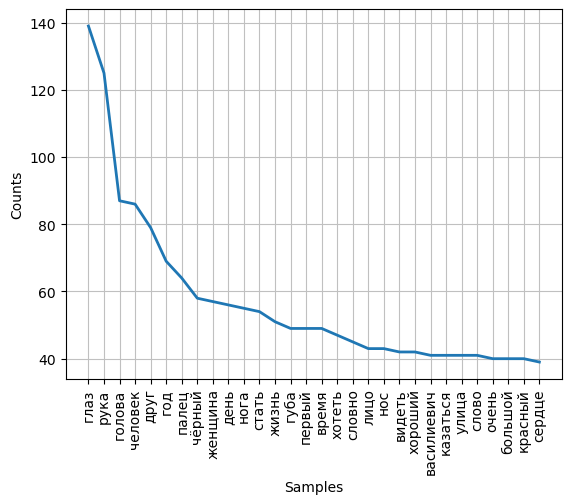

--Облоко слов по данному тексту--


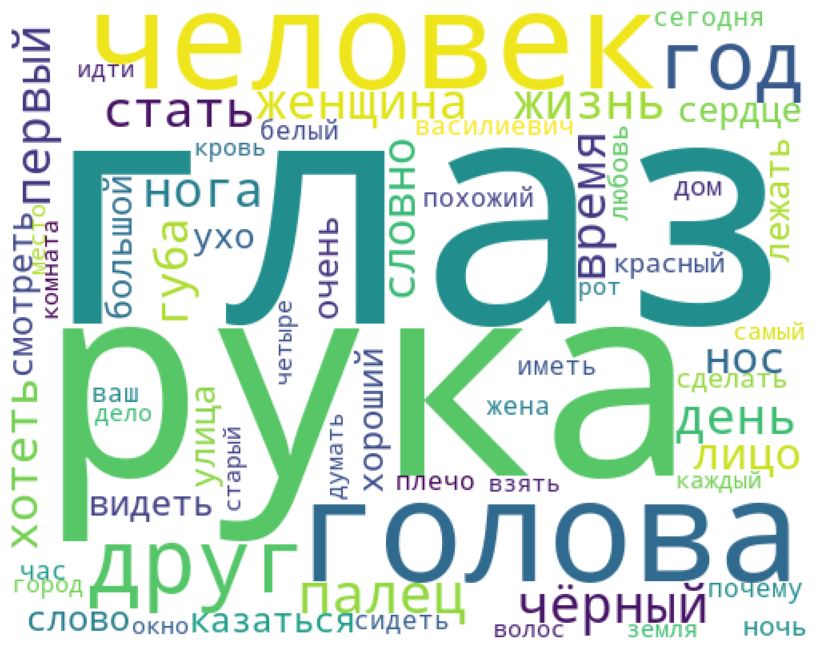

--Анализ окончен!--


In [11]:
analyze_the_text("Ciniki.txt", ["ольга", "лео", 'докучаев', 'сергей', 'владимир', "васильевич"])